# Team 19 - COMP 472 (Artificial Intelligence) Mini Project 1: Emotion and Sentiment Classification of Reddit Posts
by
Vithushen Sivasubramaniam (40112363), Vejay Thanamjeyasingam (40112236), and David Xie (40065595)

October 22, 2022

## 1. Dataset Preparation & Analysis (5pts)

### 1.1. □ (0pts) Download the version of the GoEmotion dataset provided on Moodle.
The original GoEmotion dataset, created by [Demszky et al., 2020], is a dataset of 58k humanannotated
Reddit comments labeled with 27+1 emotion categories (eg. admiration, amusement, anger,
caring, . . . ) and neutral. These emotions are themselves organized into 4 sentiments: positive (admiration,
amusement, . . . ), negative (anger, annoyance, . . . ), ambiguous (confusion, curiosity) and
neutral (neutral )). This allows us to use the dataset for both:
* emotion classification (into 28 classes), and
* sentiment classification (into 4 classes).

For more information on the original dataset, you can read this blog and this paper.
The dataset we will use for this assignment is a modified version of the original GoEmotion, where only
posts annotated with a single emotion (and a single sentiment) are kept, and the data is formatted in
json. The json file contains triplets made of the post, its emotion and its sentiment.

### 1.2. □ (0pts) Load the dataset. 
You can use gzip.open and json.load to do that.

In [2]:
import json
import gzip
from matplotlib import pyplot as plt
from collections import Counter

# opens file using GZIP and json.load
with gzip.open('goemotions.json.gz', 'rb') as f:
    file_content = json.load(f)

### 1.3. □ (5pts) Extract the posts and the 2 sets of labels (emotion and sentiment), then plot the distribution of the posts in each category and save the graphic (a histogram or pie chart) in pdf. 

Do this for both the emotion and the sentiment categories. You can use matplotlib.pyplot and savefig to do this. This pre-analysis of the dataset will allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate the performance of your classifiers.

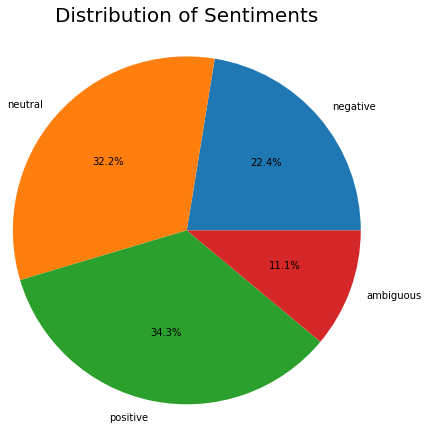

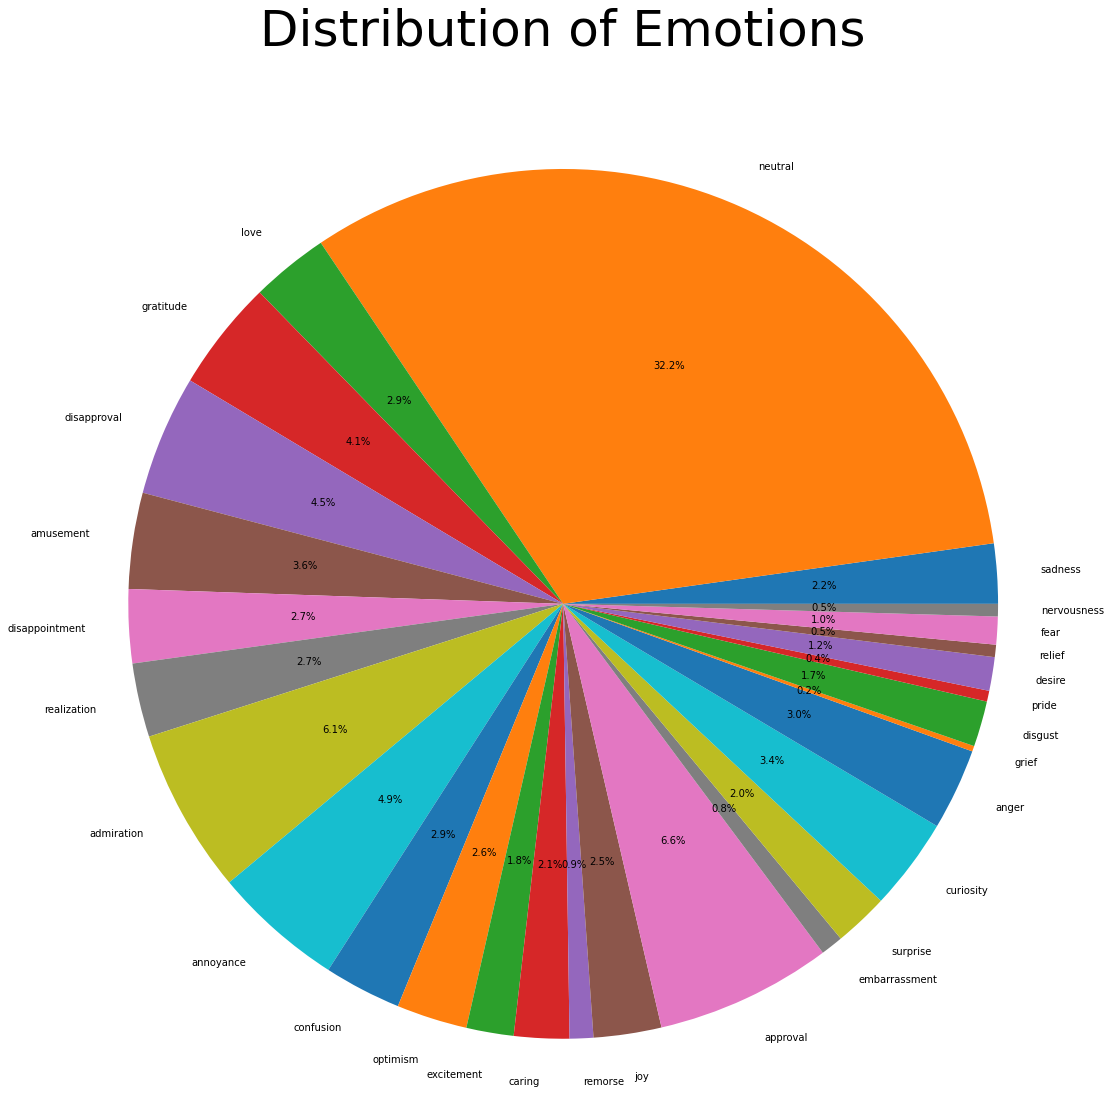

In [3]:
# Store emotions and sentiments in list
emotionList = []
sentimentList = []

for post in file_content:
    emotionList.append(post[1])
    sentimentList.append(post[2])
    

# Generate graphs using sentiment and emotion Lists
plt.figure(0)
plt.title('Distribution of Sentiments', pad=100, fontdict = {'fontsize' : 20})
plt.pie(Counter(sentimentList).values(), labels=Counter(sentimentList).keys(), radius=2, autopct="%0.1f%%")
plt.savefig("sentimentGraph.pdf", bbox_inches='tight')

plt.figure(1)
plt.title('Distribution of Emotions', pad=450, fontdict = {'fontsize' : 50})
plt.pie(Counter(emotionList).values(), labels=Counter(emotionList).keys(), radius=5, autopct="%0.1f%%")
plt.savefig("emotionGraph.pdf", bbox_inches='tight')

plt.show()

### 2.1. □ (5pts) Process the dataset using feature extraction.text.CountVectorizer to extract tokens/words and their frequencies. 
Display the number of tokens (the size of the vocabulary) in the dataset.

In [4]:
#Display number of tokens and their frequencies
from sklearn.feature_extraction.text import CountVectorizer
posts = []

cv=CountVectorizer()

for post in file_content:
    posts.append(post[0])
print("Number of posts: ", len(posts))

tokens=cv.fit(posts)
print("Number of tokens: ", len(tokens.vocabulary_))

Number of posts:  171820
Number of tokens:  30449


### 2.2. □ (2pts) Split the dataset into 80% for training and 20% for testing. 
For this, you can use train test split.

In [5]:
#Splitting the dataset (80% training and 20% testing)
from sklearn.model_selection import train_test_split

#post-emotion model
X1 = cv.fit_transform(posts)
y1 = emotionList
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20)

print("Size of X1_train: ", X1_train.shape)
print("Size of X1_test: ", X1_test.shape)
print("\n")

print("Size of y1_train: ", len(y1_train))
print("Size of y1_test: ", len(y1_test))
print("\n")

#post-sentiment model
X2 = cv.fit_transform(posts)
y2 = sentimentList
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20)

print("Size of X2_train: ", X2_train.shape)
print("Size of X2_test: ", X2_test.shape)
print("\n")

print("Size of y2_train: ", len(y2_train))
print("Size of y2_test: ", len(y2_test))

Size of X1_train:  (137456, 30449)
Size of X1_test:  (34364, 30449)


Size of y1_train:  137456
Size of y1_test:  34364


Size of X2_train:  (137456, 30449)
Size of X2_test:  (34364, 30449)


Size of y2_train:  137456
Size of y2_test:  34364


### 2.3. Train and test the following classifiers, for both the emotion and the sentiment classification, using word frequency as features.

#### 2.3.1. □ (3pts) Base-MNB: a Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html) with the default parameters.

In [5]:
from sklearn.naive_bayes import MultinomialNB

NB1 = MultinomialNB()
NB2 = MultinomialNB()

#train for emotions
model1 = NB1.fit(X1_train, y1_train)
#train for sentiments
model2 = NB2.fit(X2_train, y2_train)

#test for emotions
predict1 = model1.predict(X1_test)
print("Accuracy of posts-emotions: ", model1.score(X1_test, y1_test))

#test for sentiments
predict2 = model2.predict(X2_test)
print("Accuracy of posts-sentiments: ", model2.score(X2_test, y2_test))

Accuracy of posts-emotions:  0.382115004074031
Accuracy of posts-sentiments:  0.5453963450122221


#### 2.3.2. □ (3pts) Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters.

In [6]:
from sklearn.tree import DecisionTreeClassifier

#Create Decision Tree object
dt1=DecisionTreeClassifier()

#Train Decision Tree Classifier For Emotions 
dt1=dt1.fit(X1_train, y1_train) #For Emotions

#Predict the response for Test Dataset 
dt1.predict(X1_test)


In [ ]:
#Create Decision Tree object for Sentiments
dt2=DecisionTreeClassifier()

#Train Decision Tree Classifier For Sentiments 
dt2=dt2.fit(X2_train, y2_train) #For Sentiments

#Predict the response for Test Dataset 
dt2.predict(X1_test)

array(['negative', 'ambiguous', 'positive', ..., 'neutral', 'positive',
       'negative'], dtype='<U9')

In [ ]:
from sklearn import metrics 
print("Emotion Accuracy: ", dt1.score(X1_test, y1_test))
print("Sentiment Accuracy: ", dt2.score(X2_test, y2_test))

Emotion Accuracy:  0.3576417180770574
Sentiment Accuracy:  0.5455418461180305


#### 2.3.3. □ (3pts) Base-MLP: a Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.

In [ ]:
#2.3.3 Base-MLP
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1).fit(X1_train, y1_train)
mlp.predict(X1_test)
emotionAccuracy = mlp.score(X1_test, y1_test)

print("Prediction accuracy for emotions: ", emotionAccuracy)

In [ ]:
mlp2 = MLPClassifier(max_iter=1).fit(X2_train, y2_train)
mlp2.predict(X2_test)
sentimentAccuracy = mlp2.score(X2_test, y2_test)

print("Prediction accuracy for sentiments: ", sentimentAccuracy)

#### 2.3.4. □ (3pts)Top-MNB: a better performing Multinomial Naive Bayes Classifier found using GridSearchCV.
The gridsearch will allow you to find the best combination of hyper-parameters, as determined
by the evaluation function that you have determined in step 1.3. The only hyper-parameter that
you will experiment with is alphafloat with values 0.5, 0 and 2 other values of your choice.

In [ ]:
#importing GridSearchCV Library
from sklearn.model_selection import GridSearchCV

parameters={
    "alpha": (0.0, 0.5, 1.0, 1.5)
}

In [ ]:
#Emotion
NB_grid_emotion= GridSearchCV(NB, param_grid=parameters)
NB_grid_emotion.fit(X1_train,y1_train)

#Sentiment
NB_grid_sentiment= GridSearchCV(NB, param_grid=parameters)
NB_grid_sentiment.fit(X2_train,y2_train)

In [ ]:
#Finding the best hyperparameter
NB_grid_emotion.best_params_
NB_grid_sentiment.best_params_ 

{'alpha': 1.5}

In [ ]:
NB_grid_emotion.best_estimator_
NB_grid_sentiment.best_estimator_

MultinomialNB(alpha=1.5)

In [ ]:
print(f'Emotion Accuracy- : {NB_grid_emotion.best_score_}')
print(f'Sentiment Accuracy- : {NB_grid_sentiment.best_score_}')

Emotion Accuracy- : 0.38535969310496354
Sentiment Accuracy- : 0.5391325019862988


#### 2.3.5. □ (3pts) Top-DT: a better performing Decision Tree found using GridSearchCV. 
The hyperparameters that you will experiment with are:
* criterion: gini or entropy
* max depth: 2 different values of your choice
* min samples split: 3 different values of your choice

In [12]:
from sklearn.model_selection import GridSearchCV
parameters={
    "criterion": ['gini','entropy'],
    "max_depth" : (1,10),
    "min_samples_split": (2,4,6)
}

In [ ]:
#Emotion
DT_grid_emotion= GridSearchCV(dt1, param_grid=parameters, cv=3)
DT_grid_emotion.fit(X1_train,y1_train)

#Sentiment
DT_grid_sentiment= GridSearchCV(dt2, param_grid=parameters, cv=3)
DT_grid_sentiment.fit(X2_train,y2_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': (1, 10),
                         'min_samples_split': (2, 4, 6)})

In [ ]:
#Finding the best hyperparameter
DT_grid_emotion.best_params_
DT_grid_sentiment.best_params_ 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 6}

In [ ]:
DT_grid_emotion.best_estimator_
DT_grid_sentiment.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=6)

In [ ]:
print(f'Emotion Accuracy- : {DT_grid_emotion.best_score_}')
print(f'Sentiment Accuracy- : {DT_grid_sentiment.best_score_}')

Emotion Accuracy- : 0.3912233755090489
Sentiment Accuracy- : 0.4276204649577066


#### 2.3.6. □ (3pts) Top-MLP: a better performing Multi-Layered Perceptron found using GridSearchCV.
The hyper-parameters that you will experiment with are:
* activation: sigmoid, tanh, relu and identity
* 2 network architectures of your choice: for eg, 2 hidden layers with 30+50 nodes and 3 hidden layers with 10 + 10 + 10
* solver: Adam and stochastic gradient descent

In [15]:
#define hyperparameters
search_space = {
    "activation": ['sigmoid', 'tanh', 'relu', 'identity'],
    "hidden_layer_sizes": [(30,50), (10,10,10)],
    "solver": ['adam', 'sgd']
}

mlp1 = MLPClassifier(max_iter=1)
mlp2 = MLPClassifier(max_iter=1)

In [ ]:
gs1 = GridSearchCV(mlp1, search_space)
gs1.fit(X1_train, y1_train)
gs1.predict(X1_test)
emotionAccuracy = gs1.score(X1_test, y1_test)

print("Prediction accuracy for emotions: ", emotionAccuracy)

In [ ]:
gs2 = GridSearchCV(mlp2, search_space)
gs2.fit(X2_train, y2_train)
gs2.predict(X2_test)
sentimentAccuracy = gs2.score(X2_test, y2_test)

print("Prediction accuracy for sentiments: ", sentimentAccuracy)